# e.g. 13: WOA, similar to e.g.13 based on SODA data.

# last edited 21 August 2018

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [6]:
print('BEGIN')

%matplotlib inline

__file__='jupyter_notebook' #this can be deleted when written to a python script and loaded as module.

import numpy as np
import numpy.ma as ma
import inspect
import pickle
import bz2
import glob
import socket
import re
import os
import netCDF4

CRED = '\033[91m'
CEND = '\033[0m'

hostname=socket.gethostname()

print('hostname=',hostname)

if(re.match('raijin',hostname)):
  print('this is rajin')
  rundir='/short/v14/mac599/cafepp/rundir'
  topdir=''
elif(re.match('oa-3.-cdc',hostname)):
  print('this is vm32')
  rundir='/OSM/CBR/OA_DCFP/work/col414/cafepp'
  topdir='/OSM/CBR/OA_DCFP/data/CAFEPP/CMIP6'
  
os.chdir(rundir)

os.chdir('/OSM/CBR/OA_DCFP/work/col414/cafepp')

print('Current Working Directory=',os.getcwd())

from n_data_funcs import n_data_funcs

from decadal_diag import \
  box_indices, \
  diag_isothetaoNc, \
  calc_isoN, \
  shade_2d_latlon, \
  shade_2d_simple, \
  smooth


model='WOA1x1'

output_pickle_file_name='eg17.pkl'
input_pickle_file_name=output_pickle_file_name
  
print('END')

BEGIN
hostname= oa-32-cdc
this is vm32
Current Working Directory= /OSM/CBR/OA_DCFP/work/col414/cafepp
END


In [15]:
print('BEGIN')

os.chdir(rundir)

os.chdir('/OSM/CBR/OA_DCFP/work/col414/cafepp')

print('Current Working Directory=',os.getcwd())


idir_woa='/OSM/CBR/OA_DCFP/data/CAFEPP/short/v14/mac599/woa'
ifils_woa=[sorted( glob.glob(idir_woa+'/'+'woa13_95A4_t0[1,2,3,4,5,6,7,8,9]_01v2.nc') + glob.glob(idir_woa+'/'+'woa13_95A4_t1[0,1,2]_01v2.nc') )]

for month,ifil in enumerate(ifils_woa[0]):
  print('month=',month)
  
  ifh = netCDF4.Dataset(ifil)
  
  data = ifh.variables['t_an']
  
#   print(data.shape)
# print('ifils_woa=',ifils_woa)

  if(month==0):
    depths = ifh.variables['depth'][:]
    lons = ifh.variables['lon'][:]
      
    new_shape=[]
    new_shape.append(12)
    new_shape.append(data.shape[2])
    new_shape.append(data.shape[3])

    woa_t16d_annual_climatology=ma.zeros(new_shape,dtype=float)
    woa_t20d_annual_climatology=ma.zeros(new_shape,dtype=float)
    woa_t22d_annual_climatology=ma.zeros(new_shape,dtype=float)

  woa_t16d_annual_climatology[month,] = calc_isoN(np.squeeze(data), 16., depths, 28, 44, 135, diag=True)
  woa_t20d_annual_climatology[month,] = calc_isoN(np.squeeze(data), 20., depths, 28, 44, 135, diag=True)
  woa_t22d_annual_climatology[month,] = calc_isoN(np.squeeze(data), 22., depths, 28, 44, 135, diag=True)

#points either side of equator.
jmin=89
jmax=90

Clobber=False
Clobber=True

if(Clobber):

  print(CRED+'overwriting output PKL file '+output_pickle_file_name+' and regenerating...'+CEND)

  pkl_objects=( \
    woa_t16d_annual_climatology, woa_t20d_annual_climatology, woa_t22d_annual_climatology, lons, jmin, jmax) #jmin, jmax are values either side of equator.

if((os.path.exists(output_pickle_file_name) and Clobber) or (not os.path.exists(output_pickle_file_name))):
  print(CRED+'Pkl file exists and deleting...'+CEND)

  if(os.path.exists(output_pickle_file_name)): os.remove(output_pickle_file_name)

  pickling_out = bz2.BZ2File(output_pickle_file_name, "wb")
  pickle.dump( pkl_objects, pickling_out, protocol=4)

  pickling_out.close()

if(os.path.exists(output_pickle_file_name) and not Clobber):
  print(CRED+'Pkl file exists and keeping...'+CEND)
  
print('END')

BEGIN
hostname= oa-35-cdc
this is vm32
Current Working Directory= /OSM/CBR/OA_DCFP/work/col414/cafepp
month= 0


/OSM/CBR/OA_DCFP/work/col414/cafepp/decadal_diag.py:2713: RuntimeWarning: divide by zero encountered in double_scalars
  newdata[y,x] = (data[xabove[y,x],y,x] - value) / (data[xabove[y,x],y,x] - data[xbelow[y,x],y,x]) * (levs[xbelow[y,x]] - levs[xabove[y,x]]) + levs[xabove[y,x]]
/OSM/CBR/OA_DCFP/work/col414/cafepp/decadal_diag.py:2713: RuntimeWarning: invalid value encountered in double_scalars
  newdata[y,x] = (data[xabove[y,x],y,x] - value) / (data[xabove[y,x],y,x] - data[xbelow[y,x],y,x]) * (levs[xbelow[y,x]] - levs[xabove[y,x]]) + levs[xabove[y,x]]


month= 1
month= 2
month= 3
month= 4
month= 5
month= 6
month= 7
month= 8
month= 9
month= 10
month= 11
overwriting output PKL file eg17.pkl and regenerating...
Pkl file exists and deleting...
END


BEGIN
Current Working Directory= /OSM/CBR/OA_DCFP/work/col414/cafepp
Now importing from Pkl file...


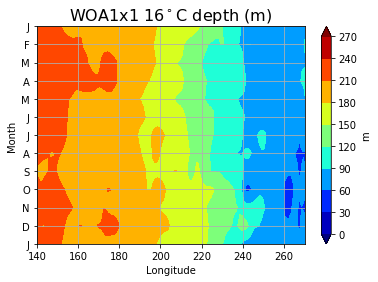

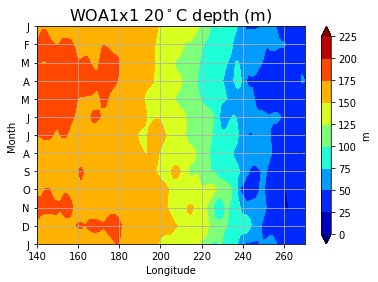

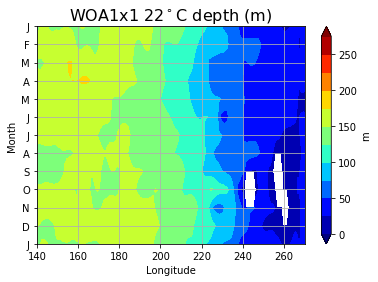

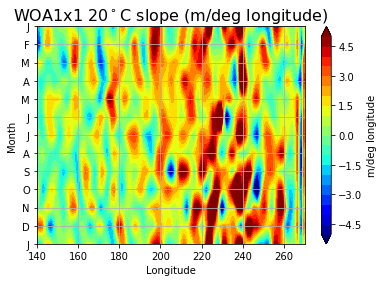

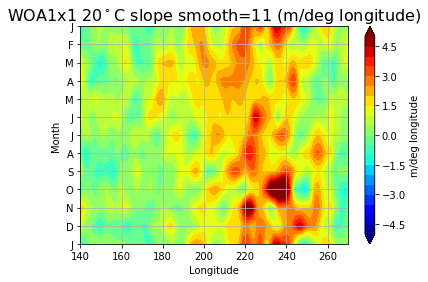

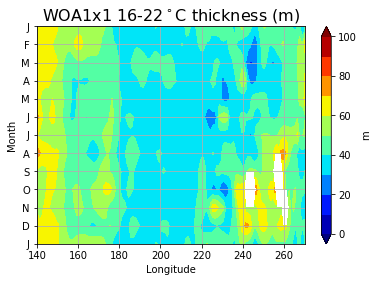

END


In [10]:
print('BEGIN')

os.chdir(rundir)

os.chdir('/OSM/CBR/OA_DCFP/work/col414/cafepp')

print('Current Working Directory=',os.getcwd())


print(CRED+'Now importing from Pkl file...'+CEND)
if(os.path.exists(input_pickle_file_name)):
  pickling_in = bz2.BZ2File(input_pickle_file_name, "rb")
  woa_t16d_annual_climatology, woa_t20d_annual_climatology, woa_t22d_annual_climatology, lons, jmin, jmax \
    = pickle.load(pickling_in)
  pickling_in.close()

#woa data on longitude grid -180 to 180, need to make 0 to 360 (and so roll lon dimension too)
lons = np.where(lons<0,lons+360,lons)
lons = np.roll(lons,180)
#print(lons)
  
woa_t16d_annual_climatology = np.roll(woa_t16d_annual_climatology,180,axis=2)
woa_t20d_annual_climatology = np.roll(woa_t20d_annual_climatology,180,axis=2)
woa_t22d_annual_climatology = np.roll(woa_t22d_annual_climatology,180,axis=2)

woa_t16d_annual_climatology=ma.masked_where(woa_t16d_annual_climatology==1e20,woa_t16d_annual_climatology)
woa_t20d_annual_climatology=ma.masked_where(woa_t20d_annual_climatology==1e20,woa_t20d_annual_climatology)
woa_t22d_annual_climatology=ma.masked_where(woa_t22d_annual_climatology==1e20,woa_t22d_annual_climatology)

#===============================================================================

hov_iso16_array=np.average(woa_t16d_annual_climatology[:,jmin:jmax+1,:],axis=1)
hov_iso16_array_shape=hov_iso16_array.shape
hov_iso16_array_shape_xtramon=[hov_iso16_array_shape[0]+1,hov_iso16_array_shape[1]]
hov_iso16_array_xtramon=ma.zeros(hov_iso16_array_shape_xtramon,dtype=float)
hov_iso16_array_xtramon[0:hov_iso16_array_shape[0],:]=hov_iso16_array
hov_iso16_array_xtramon[hov_iso16_array_shape[0],:]=hov_iso16_array[0,:]

#===============================================================================

hov_iso20_array=np.average(woa_t20d_annual_climatology[:,jmin:jmax+1,:],axis=1)
hov_iso20_array_shape=hov_iso20_array.shape
hov_iso20_array_shape_xtramon=[hov_iso20_array_shape[0]+1,hov_iso20_array_shape[1]]
hov_iso20_array_xtramon=ma.zeros(hov_iso20_array_shape_xtramon,dtype=float)
hov_iso20_array_xtramon[0:hov_iso20_array_shape[0],:]=hov_iso20_array
hov_iso20_array_xtramon[hov_iso20_array_shape[0],:]=hov_iso20_array[0,:]

#===============================================================================
hov_iso22_array=np.average(woa_t22d_annual_climatology[:,jmin:jmax+1,:],axis=1)
hov_iso22_array_shape=hov_iso22_array.shape
hov_iso22_array_shape_xtramon=[hov_iso22_array_shape[0]+1,hov_iso22_array_shape[1]]
hov_iso22_array_xtramon=ma.zeros(hov_iso22_array_shape_xtramon,dtype=float)
hov_iso22_array_xtramon[0:hov_iso22_array_shape[0],:]=hov_iso22_array
hov_iso22_array_xtramon[hov_iso22_array_shape[0],:]=hov_iso22_array[0,:]

#===============================================================================

hov_thickness_array=np.average(woa_t16d_annual_climatology[:,jmin:jmax+1+1,:],axis=1) - \
  np.average(woa_t22d_annual_climatology[:,jmin:jmax+1,:],axis=1)

hov_thickness_array_shape=hov_thickness_array.shape
hov_thickness_array_shape_xtramon=[hov_thickness_array_shape[0]+1,hov_thickness_array_shape[1]]
hov_thickness_array_xtramon=ma.zeros(hov_thickness_array_shape_xtramon,dtype=float)
hov_thickness_array_xtramon[0:hov_thickness_array_shape[0],:]=hov_thickness_array
hov_thickness_array_xtramon[hov_thickness_array_shape[0],:]=hov_thickness_array[0,:]

#===============================================================================

hov_slope_array= \
  np.gradient(np.average(woa_t20d_annual_climatology[:,jmin:jmax+1+1,:],axis=1),axis=1)*-1 #need to scale by -1 so that a positive value indicates thermocline sloping upwards towards the E. Pacfic.
hov_slope_array_shape=hov_slope_array.shape
hov_slope_array_shape_xtramon=[hov_slope_array_shape[0]+1,hov_slope_array_shape[1]]
hov_slope_array_xtramon=ma.zeros(hov_slope_array_shape_xtramon,dtype=float)
hov_slope_array_xtramon[0:hov_slope_array_shape[0],:]=hov_slope_array
hov_slope_array_xtramon[hov_slope_array_shape[0],:]=hov_slope_array[0,:]

ismth=11
hov_slope_array_xtramon_smth=ma.zeros(hov_slope_array_shape_xtramon,dtype=float)
for month in range(0,hov_slope_array_xtramon.shape[0]):
  hov_slope_array_xtramon_smth[month,:]=smooth(hov_slope_array_xtramon[month,:],window_len=ismth,window='flat')
  
#raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

#===============================================================================

clevs=None

reverse_yaxis=True
#reverse_yaxis=False

step=30;clevs=sorted(list(set(np.arange(30, 270+step, step).tolist())))
clevs=None
shade_2d_simple(hov_iso16_array_xtramon, \
  title=model+' 16$^\circ$C depth', \
  xyvals=(lons,range(0,13)), add_contours=False, \
  units='m', clevs=clevs, extend='both', cmap='jet', reverse_yaxis=reverse_yaxis, ylab='Month', xlab='Longitude', \
  ytik=(range(0,13),['J','F','M','A','M','J','J','A','S','O','N','D','J']), xlim=[140,270], grid=True) # ,xtik=([140,160,180,200,220,240,260],['a',160,180,200,220,240,260]))

#raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))
step=25;clevs=sorted(list(set(np.arange(0, 225+step, step).tolist())))
clevs=None
shade_2d_simple(hov_iso20_array_xtramon, \
  title=model+' 20$^\circ$C depth', \
  xyvals=(lons,range(0,13)), add_contours=False, \
  units='m', clevs=clevs, extend='both', cmap='jet', reverse_yaxis=reverse_yaxis, ylab='Month', xlab='Longitude', \
  ytik=(range(0,13),['J','F','M','A','M','J','J','A','S','O','N','D','J']), xlim=[140,270], grid=True) # ,xtik=([140,160,180,200,220,240,260],['a',160,180,200,220,240,260]))

step=25;clevs=sorted(list(set(np.arange(0, 275+step, step).tolist())))
#clevs=None
shade_2d_simple(hov_iso22_array_xtramon, \
  title=model+' 22$^\circ$C depth', \
  xyvals=(lons,range(0,13)), add_contours=False, \
  units='m', clevs=clevs, extend='both', cmap='jet', reverse_yaxis=reverse_yaxis, ylab='Month', xlab='Longitude', \
  ytik=(range(0,13),['J','F','M','A','M','J','J','A','S','O','N','D','J']), xlim=[140,270], grid=True) # ,xtik=([140,160,180,200,220,240,260],['a',160,180,200,220,240,260]))

step=.5;clevs=sorted(list(set(np.arange(-5, 5+step, step).tolist())))
#clevs=None
shade_2d_simple(hov_slope_array_xtramon, \
  title=model+' 20$^\circ$C slope', \
#   zn_contour=[0], \
  xyvals=(lons,range(0,13)), add_contours=False, \
  units='m/deg longitude', clevs=clevs, extend='both', cmap='jet', reverse_yaxis=reverse_yaxis, ylab='Month', xlab='Longitude', \
  ytik=(range(0,13),['J','F','M','A','M','J','J','A','S','O','N','D','J']), xlim=[140,270], grid=True)

step=.5;clevs=sorted(list(set(np.arange(-5, 5+step, step).tolist())))
#clevs=None
shade_2d_simple(hov_slope_array_xtramon_smth, \
  title=model+' 20$^\circ$C slope smooth='+str(ismth), \
#   zn_contour=[0], \
  xyvals=(lons,range(0,13)), add_contours=False, \
  units='m/deg longitude', clevs=clevs, extend='both', cmap='jet', reverse_yaxis=reverse_yaxis, ylab='Month', xlab='Longitude', \
  ytik=(range(0,13),['J','F','M','A','M','J','J','A','S','O','N','D','J']), xlim=[140,270], grid=True)

step=10;clevs=sorted(list(set(np.arange(0, 100+step, step).tolist())))
#clevs=None
shade_2d_simple(hov_thickness_array_xtramon, \
  title=model+' 16-22$^\circ$C thickness', \
  xyvals=(lons,range(0,13)), add_contours=False, \
  units='m', clevs=clevs, extend='both', cmap='jet', reverse_yaxis=reverse_yaxis, ylab='Month', xlab='Longitude', \
  ytik=(range(0,13),['J','F','M','A','M','J','J','A','S','O','N','D','J']), xlim=[140,270], grid=True)

print('END')

In [7]:
hov_iso16_array_xtramon.shape

(13, 360)